<a href="https://colab.research.google.com/github/Hanbin-git/kaggle/blob/main/20250507RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

stanford_rna_3d_folding_path = kagglehub.competition_download('stanford-rna-3d-folding')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stanford-rna-3d-folding/sample_submission.csv
/kaggle/input/stanford-rna-3d-folding/validation_sequences.csv
/kaggle/input/stanford-rna-3d-folding/test_sequences.csv
/kaggle/input/stanford-rna-3d-folding/train_labels.v2.csv
/kaggle/input/stanford-rna-3d-folding/validation_labels.csv
/kaggle/input/stanford-rna-3d-folding/train_labels.csv
/kaggle/input/stanford-rna-3d-folding/train_sequences.csv
/kaggle/input/stanford-rna-3d-folding/train_sequences.v2.csv
/kaggle/input/stanford-rna-3d-folding/MSA/R1108.MSA.fasta
/kaggle/input/stanford-rna-3d-folding/MSA/8EVR_EC.MSA.fasta
/kaggle/input/stanford-rna-3d-folding/MSA/1ZDI_S.MSA.fasta
/kaggle/input/stanford-rna-3d-folding/MSA/5FJ1_H.MSA.fasta
/kaggle/input/stanford-rna-3d-folding/MSA/2NBY_A.MSA.fasta
/kaggle/input/stanford-rna-3d-folding/MSA/3DEG_J.MSA.fasta
/kaggle/input/stanford-rna-3d-folding/MSA/2M21_A.MSA.fasta
/kaggle/input/stanford-rna-3d-folding/MSA/8U3M_A.MSA.fasta
/kaggle/input/stanford-rna-3d-folding/MSA/2OM7_F.MSA.fas

In [ ]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!kaggle competitions list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 433, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!kaggle competitions download -c stanford-rna-3d-folding

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 433, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!unzip stanford-rna-3d-folding.zip -d ./rna3d_data

unzip:  cannot find or open stanford-rna-3d-folding.zip, stanford-rna-3d-folding.zip.zip or stanford-rna-3d-folding.zip.ZIP.


In [ ]:
import pandas as pd
import os

base_path = "/kaggle/input/stanford-rna-3d-folding"
file_list = os.listdir(base_path)

for file in file_list:
    file_path = os.path.join(base_path, file)
    if file.endswith(".csv"):
        df = pd.read_csv(file_path)
        print(f"{file}: {df.shape[0]:,} rows, {df.shape[1]} columns")
    else:
        print(f"{file}: (디렉토리 또는 기타 파일)")


MSA: (디렉토리 또는 기타 파일)
sample_submission.csv: 2,515 rows, 18 columns
validation_sequences.csv: 12 rows, 5 columns
test_sequences.csv: 12 rows, 5 columns
train_labels.v2.csv: 3,677,095 rows, 6 columns
validation_labels.csv: 2,515 rows, 123 columns
train_labels.csv: 137,095 rows, 6 columns
train_sequences.csv: 844 rows, 5 columns
train_sequences.v2.csv: 5,135 rows, 5 columns


<Axes: >

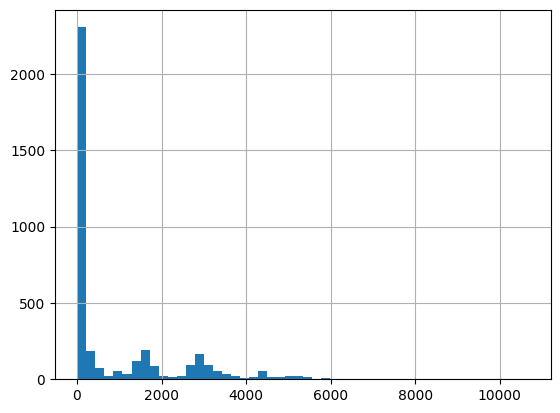

In [ ]:
# RNA 하나당 residue 수 분포 보기 (좌표 수 분포)
train_lbl = pd.read_csv(f"{base_path}/train_labels.v2.csv")
residue_counts = train_lbl['ID'].apply(lambda x: x.split('_')[0]).value_counts()

residue_counts.hist(bins=50)


<Axes: >

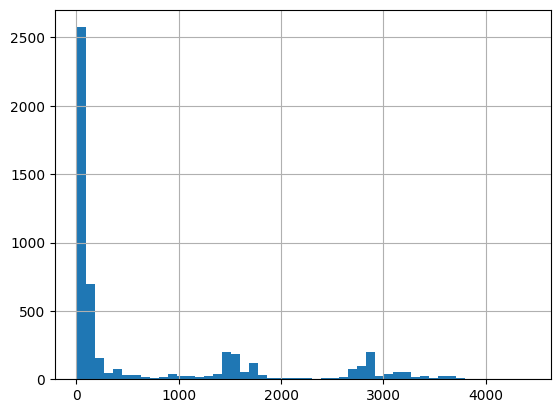

In [ ]:
# 서열 길이 분포 보기
train_seq = pd.read_csv(f"{base_path}/train_sequences.v2.csv")
train_seq['seq_len'] = train_seq['sequence'].apply(len)

train_seq['seq_len'].hist(bins=50)


In [ ]:
# 1. 라벨 컬럼 확인 (좌표 개수 파악)
train_lbl = pd.read_csv(f"{base_path}/train_labels.v2.csv")
print(train_lbl.columns.tolist())

# 2. target_id, residue 번호, 좌표 개수 예시 확인
train_lbl.head()


['ID', 'resname', 'resid', 'x_1', 'y_1', 'z_1']


,ID,resname,resid,x_1,y_1,z_1
0,7TAX_M_1,C,1,187.126007,148.246002,210.417999
1,7TAX_M_2,U,2,185.255997,152.968002,204.617996
2,7TAX_M_3,A,3,189.360992,161.802002,205.214996
3,7TAX_M_4,A,4,186.000000,156.595993,209.951996
4,7TAX_M_5,G,5,181.947998,158.186996,213.610992


In [ ]:
import torch
from torch.utils.data import Dataset

class RNADataset(Dataset):
    def __init__(self, sequence_df, label_df, max_len=1024):
        self.sequence_df = sequence_df
        self.label_df = label_df
        self.max_len = max_len
        self.base2idx = {'A': 0, 'C': 1, 'G': 2, 'U': 3}

        # target_id 리스트
        self.target_ids = sequence_df['target_id'].tolist()

        # label 사전 생성 (ID → 좌표)
        self.label_dict = self._build_label_dict()

    def _build_label_dict(self):
        label_dict = {}
        for _, row in self.label_df.iterrows():
            tid = row['ID'].rsplit('_', 1)[0]
            if tid not in label_dict:
                label_dict[tid] = []
            label_dict[tid].append([row['x_1'], row['y_1'], row['z_1']])
        return label_dict

    def __len__(self):
        return len(self.target_ids)

    def __getitem__(self, idx):
        tid = self.target_ids[idx]
        row = self.sequence_df[self.sequence_df['target_id'] == tid].iloc[0]
        seq = row['sequence']

        # 염기서열 인코딩
        seq_encoded = [self.base2idx.get(base, 4) for base in seq]  # 4는 unknown
        seq_len = len(seq_encoded)

        # padding
        if seq_len < self.max_len:
            seq_encoded += [4] * (self.max_len - seq_len)
        else:
            seq_encoded = seq_encoded[:self.max_len]

        seq_tensor = torch.tensor(seq_encoded, dtype=torch.long)

        # label 좌표 가져오기
        coords = self.label_dict.get(tid, [])
        coords_tensor = torch.tensor(coords, dtype=torch.float)

        # 좌표도 동일하게 padding or 잘라내기
        if coords_tensor.shape[0] < self.max_len:
            pad_len = self.max_len - coords_tensor.shape[0]
            pad = torch.zeros((pad_len, 3))
            coords_tensor = torch.cat([coords_tensor, pad], dim=0)
        else:
            coords_tensor = coords_tensor[:self.max_len]

        return seq_tensor, coords_tensor


In [ ]:
# CSV 파일 불러오기
train_seq = pd.read_csv(f"{base_path}/train_sequences.v2.csv")
train_lbl = pd.read_csv(f"{base_path}/train_labels.v2.csv")


In [ ]:
from torch.utils.data import DataLoader

# 학습용 데이터셋 생성
dataset = RNADataset(train_seq, train_lbl, max_len=1024)

# DataLoader 구성
loader = DataLoader(dataset, batch_size=4, shuffle=True)

# 배치 1개 확인
for batch in loader:
    seq_batch, coord_batch = batch
    print("🧬 서열 배치 크기:", seq_batch.shape)     # [4, 1024]
    print("📍 좌표 배치 크기:", coord_batch.shape)  # [4, 1024, 3]
    break


🧬 서열 배치 크기: torch.Size([4, 1024])
📍 좌표 배치 크기: torch.Size([4, 1024, 3])


In [ ]:
# 모델 구조 설계
import torch.nn as nn

class RNAFoldingModel(nn.Module):
    def __init__(self, d_model=128, nhead=4, num_layers=4, max_len=1024):
        super().__init__()
        self.embedding = nn.Embedding(5, d_model)  # A,C,G,U,PAD (0~4)

        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.regressor = nn.Linear(d_model, 3)  # x, y, z 회귀 출력
        self.max_len = max_len

    def forward(self, x):  # x: [B, L]
        x = self.embedding(x)  # [B, L, d_model]
        x = self.encoder(x)    # [B, L, d_model]
        coords = self.regressor(x)  # [B, L, 3]
        return coords


In [ ]:
# Loss 함수 정의 코드
import torch.nn.functional as F

def masked_mse_loss(pred, target, mask):
    """
    pred: [B, L, 3]
    target: [B, L, 3]
    mask: [B, L] → True(1): 실제 데이터, False(0): padding
    """
    loss = F.mse_loss(pred, target, reduction='none')  # [B, L, 3]
    loss = loss.mean(dim=-1)  # [B, L] ← 좌표별 평균
    loss = loss * mask  # padding 위치는 0이 됨
    return loss.sum() / mask.sum()


In [ ]:
import torch
from torch.utils.data import Dataset

class RNADataset(Dataset):
    def __init__(self, sequence_df, label_df, max_len=1024):
        self.sequence_df = sequence_df
        self.label_df = label_df
        self.max_len = max_len

        self.base2idx = {'A': 0, 'C': 1, 'G': 2, 'U': 3}
        self.pad_idx = 4  # 패딩 인덱스

        # 사용할 RNA ID 목록
        self.target_ids = self.sequence_df['id'].tolist() if 'id' in self.sequence_df.columns else self.sequence_df['target_id'].tolist()

        # label을 dictionary로 전처리
        self.label_dict = {}
        for tid in self.label_df['ID'].apply(lambda x: x.split('_')[0]).unique():
            coords = self.label_df[self.label_df['ID'].str.startswith(tid)][['x_1', 'y_1', 'z_1']].values
            self.label_dict[tid] = coords

    def __len__(self):
        return len(self.target_ids)

    def __getitem__(self, idx):
        tid = self.target_ids[idx]
        row = self.sequence_df[self.sequence_df['target_id'] == tid].iloc[0]
        seq = row['sequence']

        # 서열 인코딩
        seq_encoded = [self.base2idx.get(base, self.pad_idx) for base in seq]
        seq_len = len(seq_encoded)

        # 패딩 처리
        if seq_len < self.max_len:
            seq_encoded += [self.pad_idx] * (self.max_len - seq_len)
        else:
            seq_encoded = seq_encoded[:self.max_len]

        seq_tensor = torch.tensor(seq_encoded, dtype=torch.long)

        # 좌표 처리
        coords = self.label_dict.get(tid, [])
        coords_tensor = torch.tensor(coords, dtype=torch.float)

        if coords_tensor.shape[0] < self.max_len:
            pad = torch.zeros((self.max_len - coords_tensor.shape[0], 3))
            coords_tensor = torch.cat([coords_tensor, pad], dim=0)
        else:
            coords_tensor = coords_tensor[:self.max_len]

        # 마스크 생성 (실제 염기: 1, 패딩: 0)
        mask = (seq_tensor != self.pad_idx).float()

        return seq_tensor, coords_tensor, mask


In [ ]:
from torch.utils.data import DataLoader

# Dataset 인스턴스 생성
dataset = RNADataset(train_seq, train_lbl, max_len=1024)

# DataLoader 구성
loader = DataLoader(dataset, batch_size=2, shuffle=True)

# 배치 1개 확인
for seq_batch, coord_batch, mask_batch in loader:
    print("🧬 서열 인코딩 텐서 (seq_tensor):", seq_batch.shape)     # [2, 1024]
    print("📍 좌표 텐서 (coords_tensor):", coord_batch.shape)       # [2, 1024, 3]
    print("🎭 마스크 텐서 (mask):", mask_batch.shape)              # [2, 1024]

    # 예시 값 출력 (1개만)
    print("\n서열 인코딩 (0~4):", seq_batch[0][:20].tolist())
    print("좌표 일부 (x,y,z):", coord_batch[0][:3].tolist())
    print("마스크:", mask_batch[0][:20].tolist())
    break


In [ ]:
import torch.nn as nn

class RNAFoldingModel(nn.Module):
    def __init__(self, d_model=128, nhead=4, num_layers=4, max_len=1024):
        super().__init__()
        self.embedding = nn.Embedding(5, d_model)  # A, C, G, U, PAD

        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.regressor = nn.Linear(d_model, 3)  # x, y, z 좌표 예측
        self.max_len = max_len

    def forward(self, x):
        x = self.embedding(x)           # [B, L, d_model]
        x = self.encoder(x)             # [B, L, d_model]
        coords = self.regressor(x)      # [B, L, 3]
        return coords


In [ ]:
import torch
from torch.utils.data import Dataset
import numpy as np

class RNADataset(Dataset):
    def __init__(self, sequence_df, label_df, max_len=1024):
        self.sequence_df = sequence_df
        self.label_df = label_df
        self.max_len = max_len
        self.seq_dict = {
            'A': 0, 'C': 1, 'G': 2, 'U': 3, 'PAD': 4
        }

        # 서열 인코딩
        self.sequence_df['input_ids'] = self.sequence_df['sequence'].apply(
            lambda x: [self.seq_dict.get(ch, 4) for ch in x] + [4] * (max_len - len(x))
        )

        # label dictionary 구성
        self.label_dict = {}
        for tid in self.label_df['ID'].apply(lambda x: x.split('_')[0]).unique():
            coords = self.label_df[self.label_df['ID'].str.startswith(tid)][['x_1', 'y_1', 'z_1']].values
            self.label_dict[tid] = coords

    def __len__(self):
        return len(self.sequence_df)

    def __getitem__(self, idx):
        row = self.sequence_df.iloc[idx]
        seq_tensor = torch.tensor(row['input_ids'], dtype=torch.long)

        target_id = row['id']
        coords = self.label_dict.get(target_id, np.zeros((self.max_len, 3)))
        coords_tensor = torch.tensor(coords, dtype=torch.float32)
        coords_tensor = torch.cat([
            coords_tensor, torch.zeros((self.max_len - coords_tensor.shape[0], 3))
        ]) if coords_tensor.shape[0] < self.max_len else coords_tensor[:self.max_len]

        # 마스크 (좌표가 실제 있는 부분만 1, 나머지는 0)
        mask = torch.zeros(self.max_len)
        mask[:len(coords)] = 1.0

        return seq_tensor, coords_tensor, mask


In [ ]:
import pandas as pd

# Kaggle 경로에 맞게 설정
seq_path = "/kaggle/input/stanford-rna-3d-folding/train_sequences.csv"
lbl_path = "/kaggle/input/stanford-rna-3d-folding/train_labels.v2.csv"

# CSV 파일 읽기
train_seq = pd.read_csv(seq_path)
train_lbl = pd.read_csv(lbl_path)

# 확인
print("train_seq:", train_seq.shape)
print("train_lbl:", train_lbl.shape)


In [ ]:
import torch
from torch.utils.data import Dataset
import numpy as np

class RNADataset(Dataset):
    def __init__(self, sequence_df, label_df, max_len=1024):
        self.sequence_df = sequence_df
        self.label_df = label_df
        self.max_len = max_len
        self.seq_dict = {'A': 0, 'C': 1, 'G': 2, 'U': 3, 'PAD': 4}

        self.sequence_df['input_ids'] = self.sequence_df['sequence'].apply(
            lambda x: [self.seq_dict.get(ch, 4) for ch in x] + [4] * (max_len - len(x))
        )

        self.label_dict = {}
        for tid in self.label_df['ID'].apply(lambda x: x.split('_')[0]).unique():
            coords = self.label_df[self.label_df['ID'].str.startswith(tid)][['x_1', 'y_1', 'z_1']].values
            self.label_dict[tid] = coords

    def __len__(self):
        return len(self.sequence_df)

    def __getitem__(self, idx):
        row = self.sequence_df.iloc[idx]
        seq_tensor = torch.tensor(row['input_ids'], dtype=torch.long)

        target_id = row['id']
        coords = self.label_dict.get(target_id, np.zeros((self.max_len, 3)))
        coords_tensor = torch.tensor(coords, dtype=torch.float32)
        coords_tensor = torch.cat([
            coords_tensor, torch.zeros((self.max_len - coords_tensor.shape[0], 3))
        ]) if coords_tensor.shape[0] < self.max_len else coords_tensor[:self.max_len]

        mask = torch.zeros(self.max_len)
        mask[:min(len(coords), self.max_len)] = 1.0

        return seq_tensor, coords_tensor, mask


In [ ]:
print(train_lbl.columns)


In [ ]:
from torch.utils.data import DataLoader

dataset = RNADataset(train_seq, train_lbl, max_len=1024)
loader = DataLoader(dataset, batch_size=4, shuffle=True)


In [ ]:
import torch.nn as nn

class RNAFoldingModel(nn.Module):
    def __init__(self, d_model=128, nhead=4, num_layers=4, max_len=1024):
        super().__init__()
        self.embedding = nn.Embedding(5, d_model)  # A, C, G, U, PAD
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.regressor = nn.Linear(d_model, 3)  # x, y, z 좌표 예측

    def forward(self, x):
        x = self.embedding(x)
        x = self.encoder(x)
        return self.regressor(x)


In [ ]:
import torch

# 모델 로드
model = RNAFoldingModel().to(device)
model.eval()  # 평가 모드로 전환

# 첫 배치만 확인
for seq_batch, coord_batch, mask_batch in loader:
    seq_batch = seq_batch.to(device)

    with torch.no_grad():
        pred_coords = model(seq_batch)

    print("🧬 입력 시퀀스 shape:", seq_batch.shape)         # [B, L]
    print("📍 예측 좌표 shape:", pred_coords.shape)        # [B, L, 3]
    print("🔎 예측 좌표 예시 (첫 번째 시퀀스 앞 5개):")
    print(pred_coords[0][:5])  # 첫 번째 샘플의 앞 5개 좌표

    break  # 첫 배치만 테스트


In [ ]:
train_seq = pd.read_csv(f"{base_path}/train_sequences.v2.csv")
train_seq['seq_len'] = train_seq['sequence'].apply(len)

train_seq['seq_len'].hist(bins=50)
